<a href="https://colab.research.google.com/github/geroalbornoz/padrones/blob/master/Constancia_de_Inscripci%C3%B3n_AFIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cuaderno del Padrón de Constancia de Inscripción de AFIP**

Este informe es un "cuaderno" realizado en lenguaje Python, pero la intención es que cualquier persona interesada pueda consutarlo, sin necesidad de que sepa de programación.
Este Informe  utiliza un Data Set público obtenido de la web oficial :
 
http://www.afip.gob.ar/genericos/cInscripcion/archivoCompleto.asp
 
 
Lo que se hizo es bajar el padrón completo, renombrarlo a formato .csv y alojarlo en la nube. Hecho esto, podemos utilizarlo para ir obteniendo información que nos interese.
 
Esta es una primer versión, se irá actualizando con nuevos reportes o cambios para incorporar mejoras.
 
El contenido del archivo es el siguiente: "archivo completo de la condición tributaria de los contribuyentes y responsables de la Resolución General Nº 1817"
 
Diseño de Resgistro:
 
 
CUIT    1 / 11  11  
 
DENOMINACION    12 / 41 30   
 
IMP GANANCIAS   42 / 43 2   'NI' , 'AC','EX', 'NC'
 
IMP IVA 44 / 45 2   'NI' , 'AC','EX','NA','XN','AN'
 
MONOTRIBUTO 46 / 47 2   'NI' , "Codigo categoria tributaria"
 
INTEGRANTE SOC  48  1   'N' , 'S'
 
EMPLEADOR   49  1   'N', 'S'
 
ACTIVIDAD MONOTRIBUTO   51 / 52 2    
 
(*) Referencias:
'NI', 'N' = No Inscripto
'AC', 'S' = Activo
'EX' = Exento
'NA' = No alcanzado
'XN' = Exento no alcanzado
'AN' = Activo no alcanzado
'NC' = No corresponde
 
 Si querés descargar el archivo completo en formato CSV (254MB). 
 
 https://www.dropbox.com/s/ytoq4ums4oub6k0/SELE-SAL-CONSTA.p20out1.20200606.csv?dl=0
 
 Fecha: 06/06/2020:
 
 
 
# **Temas que trata el Informe en esta versión del Cuaderno:**
 
**Sección de Informes:**
 
. Qué información provee este padrón?
 
. Cual es la distribución entre Empleadores y No empleadores?
 
. Cuál es el conteo de monotributistas por Categoría 

. Cuántas CUIT hay activas en IVA y en IMPUESTO A LAS GANANCIAS?
 
 
**Sección de Búsqueda de Info en el Padrón**
 
. Buscar los datos de una Sociedad Poniendo numero de CUIT 
 
. Buscar los datos de una Sociedad o Persona Poniendo una parte de su nombre o su Razón Social 
(Ej:"Banco de", "Juan Carlos Lopez")
 
 
# **Para consultas y sugerencias:**
Autor: CP Gerónimo Albornoz
geroalbornoz@gmail.com
 
@geroalbornoz (twitter y linkedin)
 
**Nota:** Este cuaderno es realizado únicamente a fines de practicar las distintas funciones y métodos de python en un caso real. No tiene fines comerciales ni ningún otro que el manifestado.

# **Instrucciones**
**Sección de Informes:**

Al ser una versión de solo lectura, al abrir el Cuaderno se ejecutan todos los Reportes, Consultas y gráficos.

**Sección de Búsqueda de Info en el Padrón**

. Haga click en cada celda y luego en el ícono de "ejecutar celda" que está a la izquierda (ícono de play) 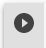

. Haga click en cada celda y apriete la combinación de teclas Control+Enter


Las celdas posteriores puede ejecutarlas o no, según si le interesa la información que reportan.

**Borrar Resultados**

Si querés limpiar la búsqueda y realizar otra, podés borrar resultados haciendo click en el ícono 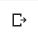 que se encuentra en la parte superior izquierda de la celda y luego apretar el ícono de la X

Si luego querés buscar nuevamente, hacés click de nuevo en el ícono de Play de la celda correspondiente.



# **Cuaderno - Sección de Informes:**


In [ ]:
#obtenemos el data set para analizar. Este paso tarda entre 3 y 20 segundos en descargar.
!wget -O dataset.csv https://www.dropbox.com/s/ytoq4ums4oub6k0/SELE-SAL-CONSTA.p20out1.20200606.csv?dl=0 #ctrl+click si querés bajarte el data set completo
print("OK Dataset")

--2020-06-22 02:48:23--  https://www.dropbox.com/s/ytoq4ums4oub6k0/SELE-SAL-CONSTA.p20out1.20200606.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ytoq4ums4oub6k0/SELE-SAL-CONSTA.p20out1.20200606.csv [following]
--2020-06-22 02:48:23--  https://www.dropbox.com/s/raw/ytoq4ums4oub6k0/SELE-SAL-CONSTA.p20out1.20200606.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc48c2039bc5b69e4e72ce25e44.dl.dropboxusercontent.com/cd/0/inline/A6F72yQS5llkjPffDSWS3TUXQVt2v2WSgEtyWCN5Uehv4Eor8ff60D2QGfqnwTA4n-lzm12Xw-QCwcPlKXVpoXNu1NYm6b08hhEgC0PH9WM8SN9UuGQkI0KnGeCkvM0aUnQ/file# [following]
--2020-06-22 02:48:23--  https://ucc48c2039bc5b69e4e72ce25e44.dl.dropboxusercontent.com/cd/0/inline/A6F72yQS5llkjPffDSWS3TUXQVt2v2WSgEtyW

In [ ]:
#carga de los módulos de Python necesarios para el informe
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
plt.rcParams['figure.figsize'] = (19,9)
print("OK carga librerias")

OK carga librerias


In [ ]:
#conversión en un objeto Data Frame (tabla)
df = pd.read_csv("dataset.csv", error_bad_lines=False,encoding='latin-1', header=None)
print("OK conversión a DataFrame de Pandas")

b'Skipping line 4523216: expected 1 fields, saw 2\nSkipping line 4523243: expected 1 fields, saw 2\nSkipping line 4523558: expected 1 fields, saw 2\nSkipping line 4524085: expected 1 fields, saw 2\nSkipping line 4524554: expected 1 fields, saw 2\nSkipping line 4524555: expected 1 fields, saw 2\nSkipping line 4525005: expected 1 fields, saw 2\nSkipping line 4525693: expected 1 fields, saw 2\nSkipping line 4525857: expected 1 fields, saw 2\nSkipping line 4525874: expected 1 fields, saw 2\nSkipping line 4525887: expected 1 fields, saw 2\nSkipping line 4525891: expected 1 fields, saw 2\nSkipping line 4525939: expected 1 fields, saw 2\nSkipping line 4526082: expected 1 fields, saw 2\nSkipping line 4526133: expected 1 fields, saw 2\nSkipping line 4526147: expected 1 fields, saw 2\nSkipping line 4526156: expected 1 fields, saw 2\nSkipping line 4526310: expected 1 fields, saw 2\nSkipping line 4526348: expected 1 fields, saw 2\nSkipping line 4526418: expected 1 fields, saw 2\nSkipping line 4526

OK conversión a DataFrame de Pandas


In [ ]:
#Se "parte" el DataFrame en varias columnas
df["CUIT"]= df[0].str.slice(start=0, stop=11, step=1)
df["DENOMINACION"]= df[0].str.slice(start=11, stop=41, step=1)
df["IMP GANANCIAS"]= df[0].str.slice(start=41, stop=43, step=1)
df["IMP IVA"]= df[0].str.slice(start=43, stop=45, step=1)
df["MONOTRIBUTO"]= df[0].str.slice(start=45, stop=47, step=1)
df["INTEGRANTE SOC"]= df[0].str.slice(start=47, stop=48, step=1)
df["EMPLEADOR"]= df[0].str.slice(start=48, stop=49, step=1)
df["ACTIVIDAD MONOTRIBUTO"]= df[0].str.slice(start=49, stop=51, step=1)
df.rename(columns={0: "a"},inplace=True)
df.drop(["a"],axis=1,inplace=True)
print("OK DataFrame en Columnas")



OK DataFrame en Columnas


**¿Qué información provee este padrón? - Listado de Columnas**

In [ ]:
#Estas son las Columnas que posee el Data Frame (df)
df.info() #ver las columnas que posee, cuantos campos completos tiene cada columna y qué tipo de objeto son

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992344 entries, 0 to 4992343
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   CUIT                   object
 1   DENOMINACION           object
 2   IMP GANANCIAS          object
 3   IMP IVA                object
 4   MONOTRIBUTO            object
 5   INTEGRANTE SOC         object
 6   EMPLEADOR              object
 7   ACTIVIDAD MONOTRIBUTO  object
dtypes: object(8)
memory usage: 304.7+ MB


In [ ]:
#Primeras filas del df
df.head(20)

,CUIT,DENOMINACION,IMP GANANCIAS,IMP IVA,MONOTRIBUTO,INTEGRANTE SOC,EMPLEADOR,ACTIVIDAD MONOTRIBUTO
0,20000033481,SUCESION DE PERROTTA CAYETANO,AC,AC,NI,N,S,00
1,20000035891,MULLER CARLOS JORGE,NI,AC,NI,N,N,00
2,20000179672,CANTARELLA ADELINA,AC,NI,NI,N,N,00
3,20000278417,SUCESION DE GEROSA RICARDO ANG,AC,AC,NI,N,N,00
4,20000684830,SUCESION DE BASAÑES ZAVALLA AL,AC,AC,NI,N,S,00
5,20000932699,SUCESION DE NUÑEZ JOSE,AC,EX,NI,N,N,00
6,20000962997,SUCESION DE FINCATI MARIA DOLO,AC,EX,NI,N,N,00
7,20001067002,CID LIBRADO,AC,EX,NI,N,N,00
8,20001220986,MERCOL OSVALDO,AC,EX,NI,N,N,00
9,20001430999,SUCESION DE VALSANGIACOMO HERC,AC,NI,NI,N,N,00


**¿Cúal es el conteo EMPLEADOR ("S") y NO EMPLEADOR ("N")?**

In [ ]:
#Ver conteo EMPLEADOR ("S") y NO EMPLEADOR ("N")
print("Total de CUIT   en el padrón: ", df["EMPLEADOR"].value_counts().sum(),'\n')
print("EMPLEADOR{:>10}".format('CANTIDAD'))
print("-"*10)
df["EMPLEADOR"].replace(["S","N"," "],["ES EMPLEADOR","NO ES EMPLEADOR","NO INFORMA"],inplace=True)
df["EMPLEADOR"].value_counts() 


Total de CUIT   en el padrón:  4992344 

EMPLEADOR  CANTIDAD
----------


NO ES EMPLEADOR    4111233
ES EMPLEADOR        543531
NO INFORMA          337580
Name: EMPLEADOR, dtype: int64

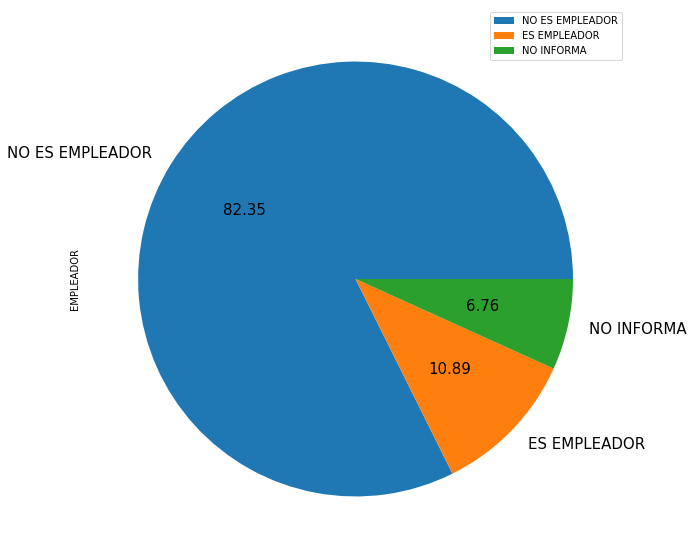

In [ ]:
#Ver Gráfico de Tipo Societario
df["EMPLEADOR"].value_counts().plot(legend=True,mark_right=False, kind="pie", rot=45,autopct='%.2f',fontsize=15,figsize=(10, 10))

**Cuál es la Cantidad de Monotributistas y su Categoría?**

In [ ]:
#Ver Listado de Cantidad de Sociedades por Provincia
MONOTRIBUTO = df.loc[lambda df: df['MONOTRIBUTO'] != "NI"]
print("Total de MONOTRIBUTISTAS en el padrón: ", MONOTRIBUTO["MONOTRIBUTO"].value_counts().sum(),'\n')
print("CATEGORIA{:>10}".format('CANTIDAD'))
print("-"*20)
MONOTRIBUTO["MONOTRIBUTO"].value_counts()
#MONOTRIBUTO.loc[MONOTRIBUTO['MONOTRIBUTO']=="61"] #para buscar categoria

Total de MONOTRIBUTISTAS en el padrón:  3575875 

CATEGORIA  CANTIDAD
--------------------


A     1107615
D      435169
B      430051
C      361172
BL     319174
E      257100
F      165687
BV     128270
G      123591
BT     110025
H       62340
BP      41619
BC      26804
I        4066
J        1713
K        1077
61        402
Name: MONOTRIBUTO, dtype: int64

**Nota:** Las categorías BL, BV, BT, BP, BC y 61 generalmente corresponden a categoría A, pero no en todos los casos.

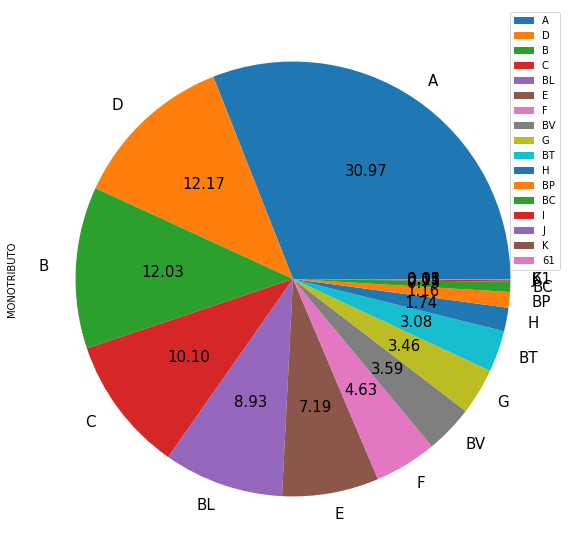

In [ ]:
#Ver Gráfico de Torta de Categoria de Monotributista
MONOTRIBUTO["MONOTRIBUTO"].value_counts().plot(legend=True,kind="pie", rot=85,autopct='%.2f',fontsize=15,figsize=(10, 10))
                                                                                                          

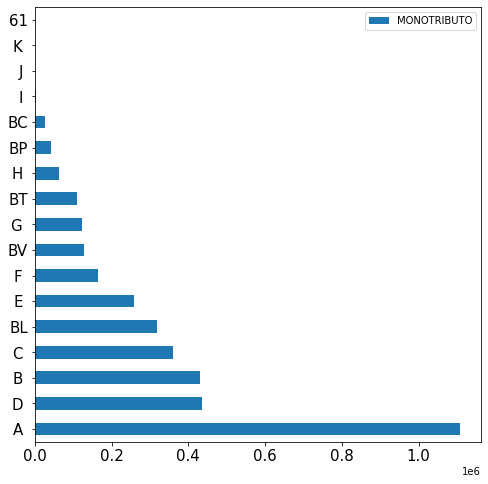

In [ ]:
#Ver Gráfico de Barras horizontales de Categoria de Monotributista
MONOTRIBUTO["MONOTRIBUTO"].value_counts().plot(legend=True, rot=0, kind="barh",fontsize=15,figsize=(8, 8))

**Cuál es la Cantidad de CUIT Activas como IVA RESPONSABLE INSCRIPTO?**

In [ ]:
#Ver Listado de Contratos por Año
RI = df.loc[lambda df: df['IMP IVA'] == "AC"]
print("Total de CUIT Activas en IVA en el padrón: ", RI["IMP IVA"].value_counts().sum(),'\n')



Total de CUIT Activas en IVA en el padrón:  984472 



**Cuál es la Cantidad de CUIT Activas en IMPUESTO A LAS GANANCIAS?**

In [ ]:
#Ver Listado de Contratos por Año
RIG = df.loc[lambda df: df['IMP GANANCIAS'] == "AC"]
print("Total de CUIT Activas en el IG en el padrón: ", RIG["IMP IVA"].value_counts().sum(),'\n')


Total de CUIT Activas en el IG en el padrón:  1352452 



# **Cuaderno - Sección de Búsquedas:**

**Buscar la Información de un determinado CUIT**

In [ ]:
#Haga Click en la Celda y luego Play para empezar
NUMERO_CUIT = input("Escriba la CUIT (sin puntos ni guiones) y presione Enter: ") 
print("La CUIT seleccionada es", NUMERO_CUIT)

Escriba la CUIT (sin puntos ni guiones) y presione Enter: 30500000
La CUIT seleccionada es 30500000


In [ ]:
#Haga click en Play para ver la información de la CUIT
df.loc[df["CUIT"].str.contains(NUMERO_CUIT)]

,CUIT,DENOMINACION,IMP GANANCIAS,IMP IVA,MONOTRIBUTO,INTEGRANTE SOC,EMPLEADOR,ACTIVIDAD MONOTRIBUTO
4523198,30500000127,SEGUROS SURA S.A,AC,AC,NI,N,ES EMPLEADOR,00


**Buscar la Información de una determinada Persona o Empresa**

In [ ]:
#Haga Click en la Celda y luego Play para empezar
RAZON = input("Escriba cómo empieza el nombre de la razon social y presione Enter: ") 
RAZON = RAZON.upper()
print("La Búsqueda seleccionada es", RAZON)

Escriba cómo empieza el nombre de la razon social y presione Enter: seguros
La Búsqueda seleccionada es SEGUROS


In [ ]:
#Haga click en Play para ver la información de la CUIT
df.loc[df["DENOMINACION"].str.contains(RAZON)]

,CUIT,DENOMINACION,IMP GANANCIAS,IMP IVA,MONOTRIBUTO,INTEGRANTE SOC,EMPLEADOR,ACTIVIDAD MONOTRIBUTO
640791,20167907335,SEGUROSKY JUAN DANIEL,AC,AC,NI,N,ES EMPLEADOR,00
3214232,27174801164,SEGUROSKY ROSA CATALINA,NI,NI,B,N,NO ES EMPLEADOR,08
3640477,27255838453,SEGUROSKY CLAUDIA ROXANA,NI,NI,A,N,NO ES EMPLEADOR,08
4209311,27346299857,SEGUROSKY FLORENCIA,NI,NI,C,N,NO ES EMPLEADOR,10
4523198,30500000127,SEGUROS SURA S.A,AC,AC,NI,N,ES EMPLEADOR,00
...,...,...,...,...,...,...,...,...
4984772,33715723579,CASTRO BROKER DE SEGUROS S.R.L,AC,AC,NI,N,NO ES EMPLEADOR,00
4985769,33715896589,C Y C ASESORES DE SEGUROS S.A.,AC,AC,NI,N,NO ES EMPLEADOR,00
4989341,33716438509,SP CONSULTORA DE SEGUROS Y SER,AC,AC,NI,N,NO ES EMPLEADOR,00
4989492,33716458909,AYRAS ASESORES DE SEGUROS SA,AC,AC,NI,N,ES EMPLEADOR,00
